In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Replace 'file.csv' with the actual name of your CSV file
file_path = 'C:/Users/fishm/Documents/UT Bootcamp/Project 1/Project-1/Resources/'
csv_file = 'us_disaster_declarations.csv'
url = file_path + csv_file
#print(url)

#df = pd.read_csv('C:/Users/fishm/Documents/UT Bootcamp/Project 1/us_disaster_declarations.csv')
us_disasters_df = pd.read_csv(url)

us_disasters_df.head()

,fema_declaration_string,disaster_number,state,declaration_type,declaration_date,fy_declared,incident_type,declaration_title,ih_program_declared,ia_program_declared,...,incident_end_date,disaster_closeout_date,fips,place_code,designated_area,declaration_request_number,last_ia_filing_date,last_refresh,hash,id
0,DR-1-GA,1,GA,DR,1953-05-02T00:00:00Z,1953,Tornado,Tornado,0,1,...,1953-05-02T00:00:00Z,1954-06-01T00:00:00Z,13000,0,Statewide,53013,NaN,2023-03-18T13:22:03Z,48af1afcc4535aa910ddb5b85eebe047dc703a6b,da5c8f17-c28f-4c41-8e06-fa8efc85aa4a
1,DR-2-TX,2,TX,DR,1953-05-15T00:00:00Z,1953,Tornado,Tornado & Heavy Rainfall,0,1,...,1953-05-15T00:00:00Z,1958-01-01T00:00:00Z,48000,0,Statewide,53003,NaN,2023-03-18T13:22:03Z,6bbba411d294ec521683e36313c8da2992e8a857,b0b41f55-0d77-43ac-898c-3cc4a18231e6
2,DR-3-LA,3,LA,DR,1953-05-29T00:00:00Z,1953,Flood,Flood,0,1,...,1953-05-29T00:00:00Z,1960-02-01T00:00:00Z,22000,0,Statewide,53005,NaN,2023-03-18T13:22:03Z,5b2fa18b404bdcf0d3038cd17f1aa995d5412f48,9fd9401d-c76c-43c3-b42a-6a4ae5139ec0
3,DR-4-MI,4,MI,DR,1953-06-02T00:00:00Z,1953,Tornado,Tornado,0,1,...,1953-06-02T00:00:00Z,1956-02-01T00:00:00Z,26000,0,Statewide,53004,NaN,2023-03-18T13:22:03Z,403164346eb22263810402e8b67f1712f1574ad5,67324f38-1f00-4bbc-aeda-5194d1befad6
4,DR-5-MT,5,MT,DR,1953-06-06T00:00:00Z,1953,Flood,Floods,0,1,...,1953-06-06T00:00:00Z,1955-12-01T00:00:00Z,30000,0,Statewide,53006,NaN,2023-03-18T13:22:03Z,8c775d2ce843a8eba2417f9716ba5c75fe0e53f3,e3853916-c7a2-4557-ad8e-60a42d369a61


In [3]:
unique_disasters = us_disasters_df['incident_type'].unique()
unique_disasters

array(['Tornado', 'Flood', 'Fire', 'Other', 'Earthquake', 'Hurricane',
       'Volcanic Eruption', 'Severe Storm', 'Toxic Substances', 'Typhoon',
       'Drought', 'Dam/Levee Break', 'Snowstorm', 'Severe Ice Storm',
       'Freezing', 'Coastal Storm', 'Fishing Losses', 'Mud/Landslide',
       'Human Cause', 'Terrorist', 'Tsunami', 'Chemical', 'Biological',
       'Tropical Storm', 'Winter Storm'], dtype=object)

In [4]:
disaster_counts = us_disasters_df['incident_type'].value_counts()

# Print out the count of disaster-type instances
for disaster, count in disaster_counts.items():
    print(f"There are {count} occurrences of {disaster}")

There are 17490 occurrences of Severe Storm
There are 13045 occurrences of Hurricane
There are 10693 occurrences of Flood
There are 7857 occurrences of Biological
There are 3707 occurrences of Snowstorm
There are 3615 occurrences of Fire
There are 2942 occurrences of Severe Ice Storm
There are 1569 occurrences of Tornado
There are 1292 occurrences of Drought
There are 637 occurrences of Coastal Storm
There are 307 occurrences of Other
There are 301 occurrences of Freezing
There are 228 occurrences of Earthquake
There are 130 occurrences of Typhoon
There are 54 occurrences of Tropical Storm
There are 51 occurrences of Volcanic Eruption
There are 43 occurrences of Winter Storm
There are 42 occurrences of Fishing Losses
There are 37 occurrences of Mud/Landslide
There are 13 occurrences of Dam/Levee Break
There are 9 occurrences of Tsunami
There are 9 occurrences of Chemical
There are 9 occurrences of Toxic Substances
There are 7 occurrences of Human Cause
There are 5 occurrences of Terror

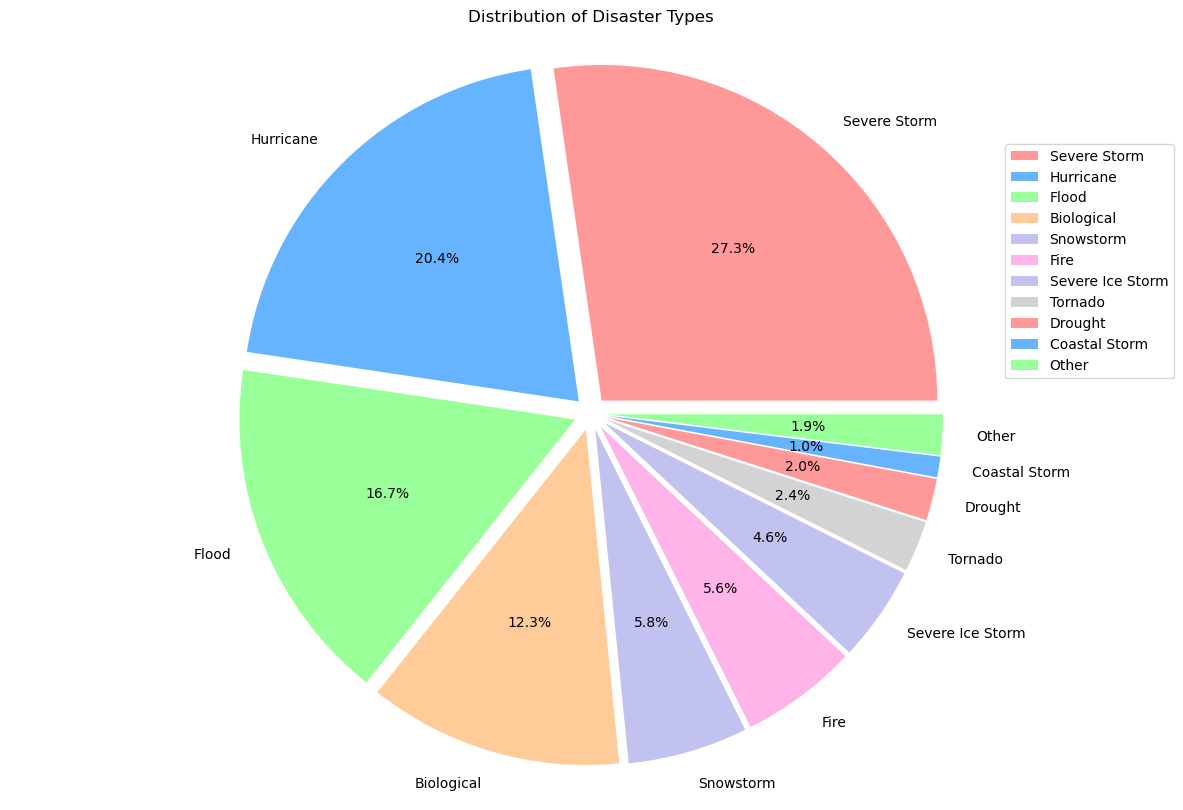

In [12]:
# Calculate the total count of all disaster types
total_count = disaster_counts.sum()

# Identify disaster types with counts under 2%
threshold_percentage = .5
small_counts = disaster_counts[disaster_counts / total_count * 100 < threshold_percentage]

# Sum the counts of identified disaster types to get the total count for the "other" category
other_count = small_counts.sum()

# Create a new DataFrame with disaster types above 2% and add the "other" category
grouped_disaster_counts = disaster_counts[disaster_counts / total_count * 100 >= threshold_percentage].copy()
grouped_disaster_counts['Other'] = other_count

# Set custom colors for the pie chart (optional)
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', '#c2c2f0', '#d3d3d3']  # Add color for the "other" category
explode = (0.05, 0.05, 0.05, 0.05, 0.05,0.05, 0.05, 0.05, 0.05, 0.05,0.05 )  # Make sure the length matches the number of segments

plt.figure(figsize=(15, 10))  # Increase the figure size for better readability

# Plot the pie chart
plt.pie(grouped_disaster_counts, labels=grouped_disaster_counts.index, autopct='%1.1f%%', colors=colors, explode=explode)

# Add a legend to display labels outside the pie chart
plt.legend(grouped_disaster_counts.index, loc='center left', bbox_to_anchor=(0.85, 0.70))

plt.title('Distribution of Disaster Types')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the pie chart
plt.savefig("graphics/top_10_nat_ds.png", bbox_inches='tight', dpi=300)

plt.show()

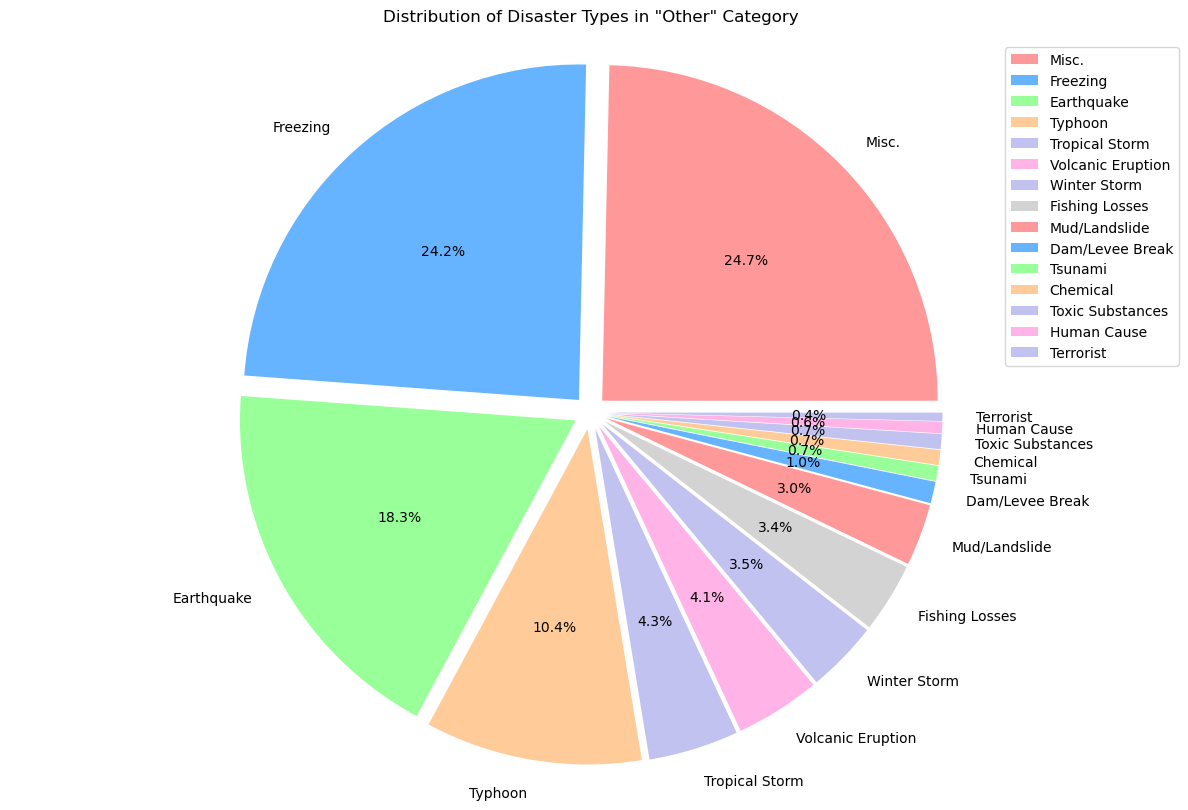

In [13]:
total_count = disaster_counts.sum()

# Identify disaster types with counts under 2%
threshold_percentage = 0.5
small_counts = disaster_counts[disaster_counts / total_count * 100 < threshold_percentage]
small_counts.rename(index={'Other': 'Misc.'}, inplace=True)
# Set custom colors for the pie chart (optional)
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', '#c2c2f0', '#d3d3d3']  # Add color for the "other" category

plt.figure(figsize=(15, 10))  # Adjust figure size for the "Other" pie chart

explode = (0.05, 0.05, 0.05, 0.05, 0.05,0.05, 0.05, 0.05, 0.05, 0.05,0.05,  0.05, 0.05, 0.05, 0.05)  # Make sure the length matches the number of segments

# Plot the pie chart for the "Other" category
plt.pie(small_counts, labels=small_counts.index, autopct='%1.1f%%', colors=colors, explode=explode)
plt.legend(small_counts.index, loc='center left', bbox_to_anchor=(0.85, 0.77))

plt.title('Distribution of Disaster Types in "Other" Category')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.savefig("graphics/other_category.png", bbox_inches='tight', dpi=300)

# Show the pie chart for the "Other" category
plt.show()

In [15]:
unique_states = us_disasters_df['state'].unique()
disasters_per_state_counts = us_disasters_df['state'].value_counts()

# Print out the count of disaster-type instances
for states, count in disasters_per_state_counts.items():
    print(f"There are {count} occurrences of {states}")

There are 5173 occurrences of TX
There are 2704 occurrences of MO
There are 2583 occurrences of KY
There are 2524 occurrences of VA
There are 2493 occurrences of LA
There are 2474 occurrences of OK
There are 2352 occurrences of FL
There are 2278 occurrences of GA
There are 2096 occurrences of NC
There are 1987 occurrences of PR
There are 1906 occurrences of MS
There are 1848 occurrences of IA
There are 1759 occurrences of KS
There are 1665 occurrences of AL
There are 1605 occurrences of TN
There are 1599 occurrences of CA
There are 1593 occurrences of AR
There are 1563 occurrences of MN
There are 1503 occurrences of NY
There are 1485 occurrences of NE
There are 1451 occurrences of IN
There are 1430 occurrences of SD
There are 1359 occurrences of ND
There are 1283 occurrences of IL
There are 1281 occurrences of OH
There are 1239 occurrences of PA
There are 1232 occurrences of WV
There are 1019 occurrences of ME
There are 979 occurrences of WA
There are 947 occurrences of SC
There are 89

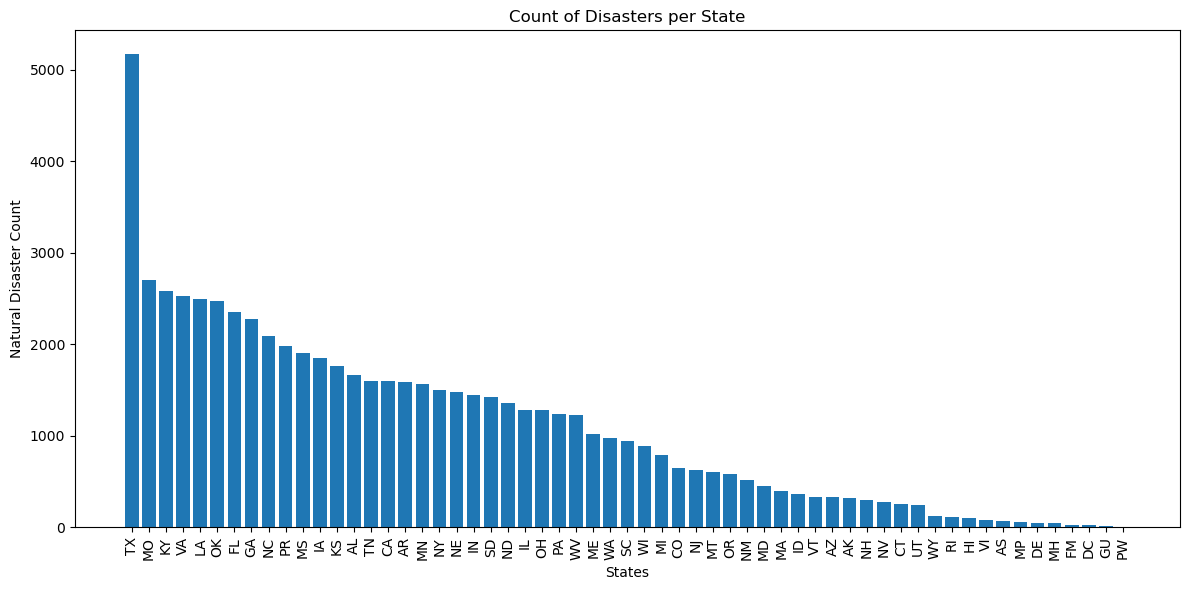

In [16]:
# Plot the bar chart
plt.figure(figsize=(12, 6))  # Set the figure size (optional)
plt.bar(disasters_per_state_counts.index, disasters_per_state_counts)
plt.xlabel('States')
plt.ylabel('Natural Disaster Count')
plt.title('Count of Disasters per State')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better visibility (optional)
# cborn
# Show the bar chart
plt.savefig("graphics/disasters_per_state.png")
plt.tight_layout()  # Ensures that the labels and title fit within the plot area
plt.show()